In [5]:
import tensorflow as tf
import keras
import PIL
import numpy as np
import pandas as pd
import os

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1074975017002364950
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14433386496
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15783150736973505252
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


I0000 00:00:1745405149.463754   40182 gpu_device.cc:2019] Created device /device:GPU:0 with 13764 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5


In [18]:
# Base path to the dataset

base_path = "/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/"

In [49]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class SignLanguageGenerator(Sequence):
    def __init__(self, root_dir, labels_path, batch_size=8, frame_size=(256, 256), max_frames=30, shuffle=True):
        self.root_dir = root_dir
        self.batch_size = batch_size
        self.frame_size = frame_size
        self.max_frames = max_frames
        self.shuffle = shuffle

        # Load labels
        self.labels_df = pd.read_excel(labels_path)
        self.label_map = {str(row['SignID']).zfill(4): idx for idx, row in self.labels_df.iterrows()}

        # Index all repetition folders
        self.samples = self._gather_samples()
        self.on_epoch_end()

    def _gather_samples(self):
        samples = []
        for sign_id in os.listdir(self.root_dir):
            sign_path = os.path.join(self.root_dir, sign_id)
            if not os.path.isdir(sign_path): continue

            for rep_folder in os.listdir(sign_path):
                rep_path = os.path.join(sign_path, rep_folder)
                if os.path.isdir(rep_path):
                    samples.append((rep_path, sign_id))
        return samples

    def __len__(self):
        return int(np.ceil(len(self.samples) / self.batch_size))

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.samples)

    def __getitem__(self, idx):
        batch_samples = self.samples[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x, batch_y = [], []

        for rep_path, sign_id in batch_samples:
            frames = self._load_frames(rep_path)
            label = self.label_map.get(sign_id, -1)

            if label == -1:
                continue  # skip unknown labels

            batch_x.append(frames)
            batch_y.append(label)

        return np.array(batch_x), np.array(batch_y)

    def _load_frames(self, rep_path):
        frame_files = sorted([
            os.path.join(rep_path, f)
            for f in os.listdir(rep_path)
            if f.endswith('.jpg')
        ])
        # Load and resize images
        frames = [
            img_to_array(load_img(f, target_size=self.frame_size)) / 255.0
            for f in frame_files
        ]
        # Pad or truncate to max_frames
        if len(frames) >= self.max_frames:
            frames = frames[:self.max_frames]
        else:
            pad = [np.zeros_like(frames[0])] * (self.max_frames - len(frames))
            frames.extend(pad)

        return np.stack(frames)


In [92]:
train_gen = SignLanguageGenerator(
    root_dir=os.path.join(base_path, 'train'),
    labels_path=os.path.join(base_path, 'KARSL-100_Labels.xlsx'),
    batch_size=5,
    frame_size=(256, 256),
    max_frames=40
)

In [97]:
_, (batch_signs, labels) = next(enumerate(train_gen))

In [98]:
import matplotlib.pyplot as plt

In [104]:
labels

array([ 0,  2,  4, 82, 38])

In [103]:
batch_signs.shape

(5, 40, 256, 256, 3)

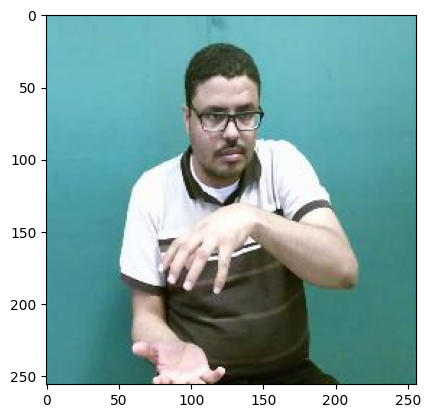

In [105]:
plt.imshow(batch_signs[4][0])

In [91]:
train_gen.label_map

{'0071': 0,
 '0072': 1,
 '0073': 2,
 '0074': 3,
 '0075': 4,
 '0076': 5,
 '0077': 6,
 '0078': 7,
 '0079': 8,
 '0080': 9,
 '0081': 10,
 '0082': 11,
 '0083': 12,
 '0084': 13,
 '0085': 14,
 '0086': 15,
 '0087': 16,
 '0088': 17,
 '0089': 18,
 '0090': 19,
 '0091': 20,
 '0092': 21,
 '0093': 22,
 '0094': 23,
 '0095': 24,
 '0096': 25,
 '0097': 26,
 '0098': 27,
 '0099': 28,
 '0100': 29,
 '0101': 30,
 '0102': 31,
 '0103': 32,
 '0104': 33,
 '0105': 34,
 '0106': 35,
 '0107': 36,
 '0108': 37,
 '0109': 38,
 '0110': 39,
 '0111': 40,
 '0112': 41,
 '0113': 42,
 '0114': 43,
 '0115': 44,
 '0116': 45,
 '0117': 46,
 '0118': 47,
 '0119': 48,
 '0120': 49,
 '0121': 50,
 '0122': 51,
 '0123': 52,
 '0124': 53,
 '0125': 54,
 '0126': 55,
 '0127': 56,
 '0128': 57,
 '0129': 58,
 '0130': 59,
 '0131': 60,
 '0132': 61,
 '0133': 62,
 '0134': 63,
 '0135': 64,
 '0136': 65,
 '0137': 66,
 '0138': 67,
 '0139': 68,
 '0140': 69,
 '0141': 70,
 '0142': 71,
 '0143': 72,
 '0144': 73,
 '0145': 74,
 '0146': 75,
 '0147': 76,
 '0148': 